In [4]:
!pip install tensorflow

# New Section

In [5]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [6]:
!pip install seaborn

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn import preprocessing
from tensorflow.keras import layers
from keras.models import Sequential  
from keras.layers import Dense, Dropout

In [8]:
# Loading the full data for Titanic
titanic = pd.read_csv("titanic.csv", header = 0)

In [9]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [88]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


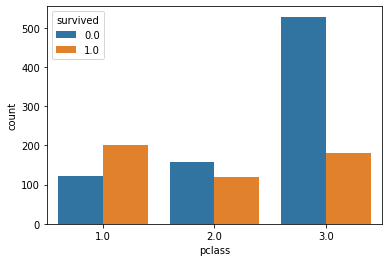

In [71]:
sns.countplot(x='pclass', hue='survived', data= titanic)

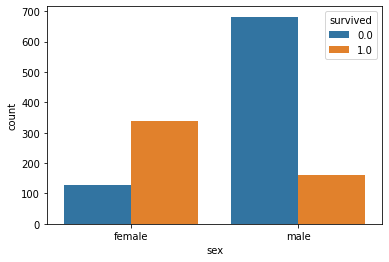

In [72]:
sns.countplot(x = "sex", hue = "survived", data= titanic)

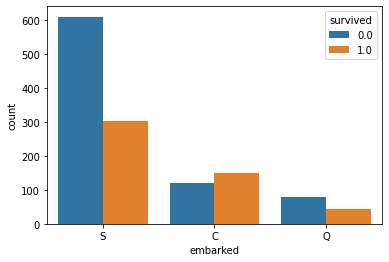

In [73]:
sns.countplot(x='embarked', hue='survived', data= titanic)

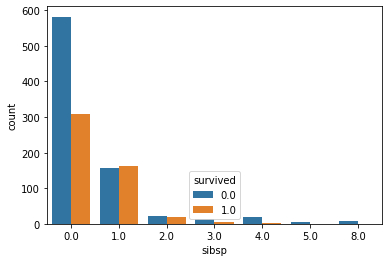

In [74]:
sns.countplot(x='sibsp', hue='survived', data= titanic)

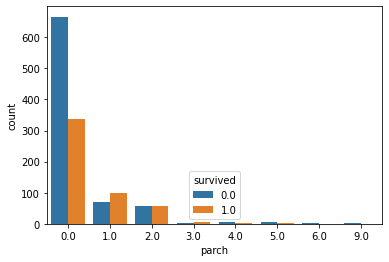

In [75]:
sns.countplot(x='parch', hue='survived', data= titanic)

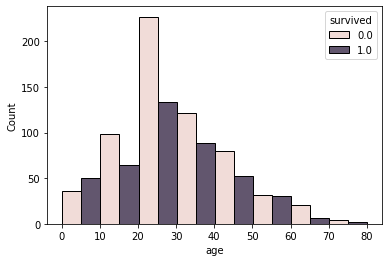

In [76]:
sns.histplot(data = titanic, x = "age", hue = "survived", multiple= "dodge", bins= 8, shrink= 1)

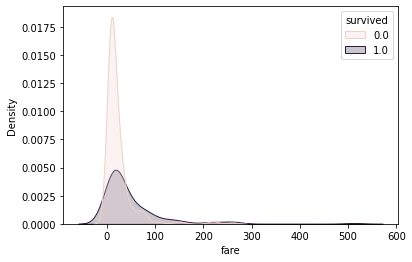

In [86]:
sns.kdeplot(data = titanic, x = "fare", hue = "survived", color = "Green", shade= True, fill = True)

In [11]:
#Selecting meaningful columns and creating new dataframe uding those
cols = ['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df = titanic[cols]

In [12]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   float64
 5   parch     1309 non-null   float64
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(6), object(2)
memory usage: 82.0+ KB


In [14]:
len(df)

1310

In [15]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [16]:
#Checking for null values
df.isna().sum()

pclass        1
survived      1
sex           1
age         264
sibsp         1
parch         1
fare          2
embarked      3
dtype: int64

In [17]:
#Dropping rows with any null values
df = df.dropna()

In [18]:
len(df)

1043

In [19]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


In [20]:
#Creating dummies for embarked
emb = pd.get_dummies(df['embarked'])

In [21]:
#Joining dummies dataframe to original dataframe
df = df.join(emb)

In [22]:
#Changing sex into binary values
df['sex'] = df['sex'].map( {'female':0, 'male':1} ).astype(int)


In [23]:
#Converting class of some columns
convert_dict = {'pclass': int,
                'survived': int,
                'sibsp': int,
                'parch': int
                
               }
df = df.astype(convert_dict)
print(df.dtypes)

pclass        int64
survived      int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
C             uint8
Q             uint8
S             uint8
dtype: object


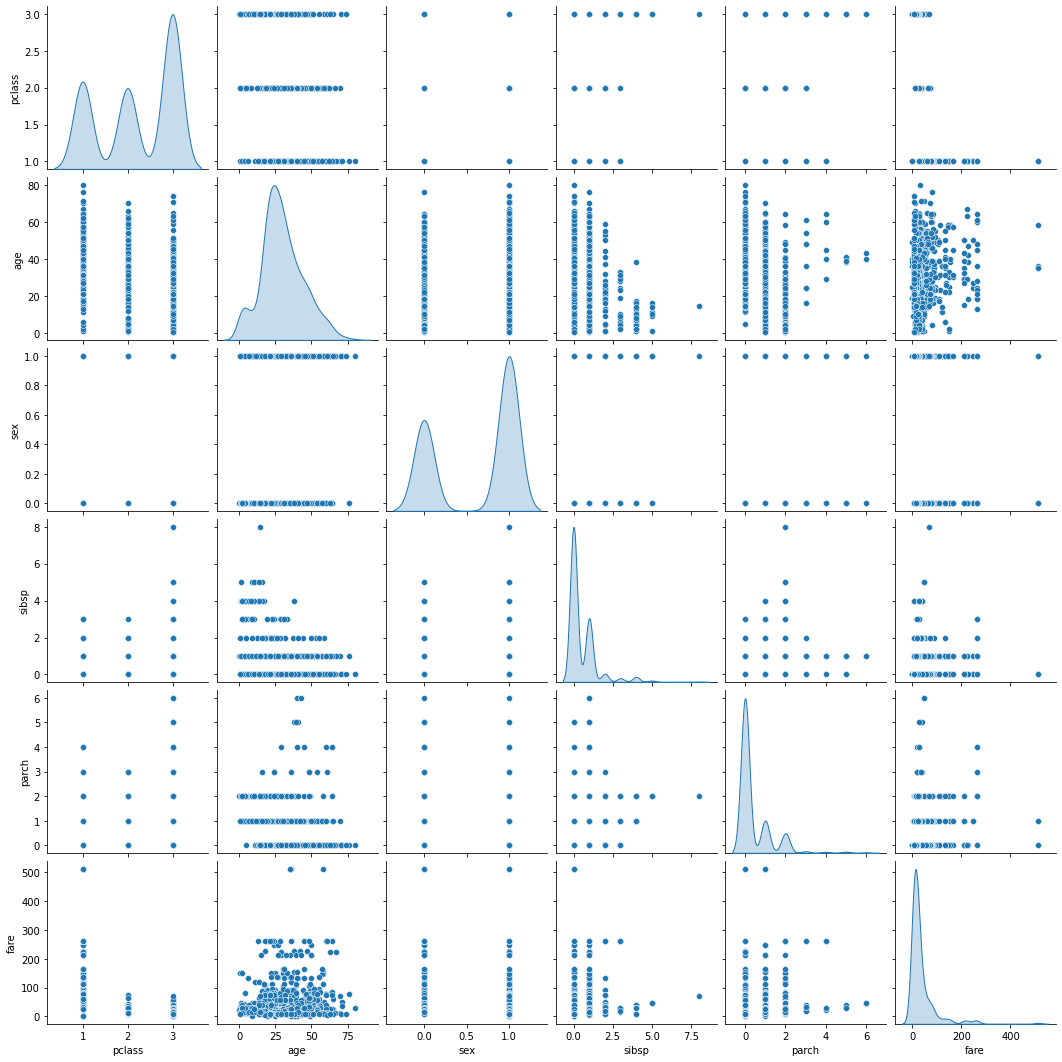

In [24]:
#Pairplot to show the relationship for combination of variable
sns.pairplot(df[["pclass", "age", "sex", "sibsp", "parch", "fare", "embarked"]], diag_kind = "kde")

In [25]:
#Survived vs Dead counts
df['survived'].value_counts()

0    618
1    425
Name: survived, dtype: int64

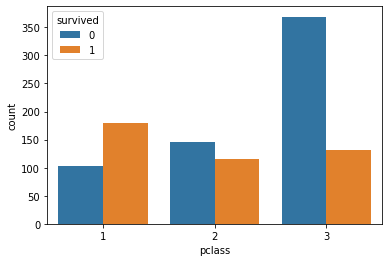

In [26]:
sns.countplot(x='pclass', hue='survived', data= df)

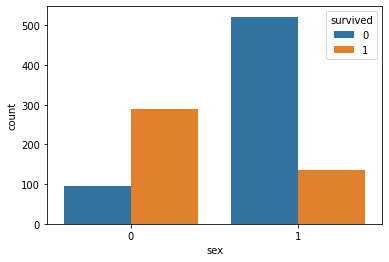

In [27]:
sns.countplot(x = "sex", hue = "survived", data= df)

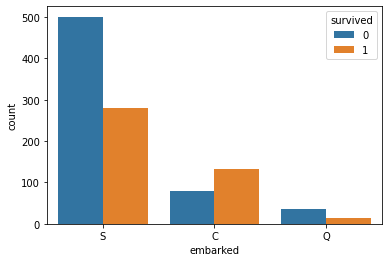

In [28]:
sns.countplot(x='embarked', hue='survived', data= df )

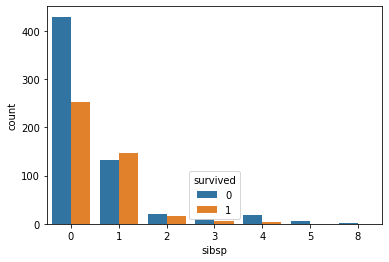

In [29]:
sns.countplot(x='sibsp', hue='survived', data= df )

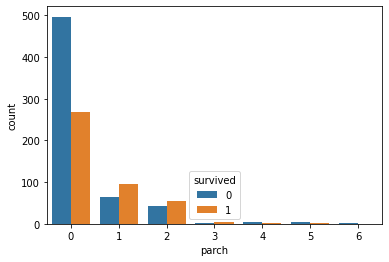

In [30]:
sns.countplot(x='parch', hue='survived', data= df )

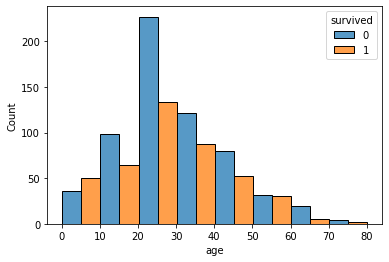

In [31]:
sns.histplot(data = df, x = "age", hue = "survived", multiple= "dodge", bins= 8, shrink= 1)

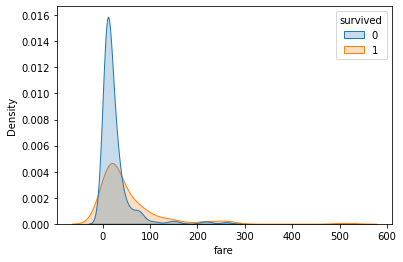

In [78]:
sns.kdeplot(data = df, x = "fare", hue = "survived", fill = True)

In [33]:
#creating train and test dataframe from df
partition = np.random.rand( len(df) ) < 0.8
train_df = df[partition]
test_df = df[~partition]

In [34]:
#dropping embarked from train and test dataframe (as its dummies are present)
train_df = train_df.drop(['embarked'], axis = 1)
test_df = test_df.drop(['embarked'], axis = 1)

In [35]:
train_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,C,Q,S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1
2,1,0,0,2.0000,1,2,151.5500,0,0,1
3,1,0,1,30.0000,1,2,151.5500,0,0,1
5,1,1,1,48.0000,0,0,26.5500,0,0,1


In [36]:
test_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,C,Q,S
4,1,0,0,25.0,1,2,151.5500,0,0,1
9,1,0,1,71.0,0,0,49.5042,1,0,0
12,1,1,0,24.0,0,0,69.3000,1,0,0
13,1,1,0,26.0,0,0,78.8500,0,0,1
17,1,1,0,50.0,0,1,247.5208,1,0,0


#Preprocessing data to use for models

In [37]:
x_train = train_df.iloc[:, train_df.columns != 'survived']
x_train.head()

,pclass,sex,age,sibsp,parch,fare,C,Q,S
0,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,0.9167,1,2,151.5500,0,0,1
2,1,0,2.0000,1,2,151.5500,0,0,1
3,1,1,30.0000,1,2,151.5500,0,0,1
5,1,1,48.0000,0,0,26.5500,0,0,1


In [38]:
y_train = train_df.iloc[:, train_df.columns == 'survived']
y_train.head()

,survived
0,1
1,1
2,0
3,0
5,1


In [39]:
x_test = test_df.iloc[:, test_df.columns != 'survived']
x_test.head()

,pclass,sex,age,sibsp,parch,fare,C,Q,S
4,1,0,25.0,1,2,151.5500,0,0,1
9,1,1,71.0,0,0,49.5042,1,0,0
12,1,0,24.0,0,0,69.3000,1,0,0
13,1,0,26.0,0,0,78.8500,0,0,1
17,1,0,50.0,0,1,247.5208,1,0,0


In [89]:
y_test = test_df.iloc[:, test_df.columns == 'survived']
y_test.head()

,survived
4,0
9,0
12,1
13,1
17,1


#Creating, training and testing Models
#Using them for prediction

In [41]:
#Initialising the ANN

model = Sequential()

model.add( Dense(units=16, input_dim=9, kernel_initializer='uniform', activation='relu') )

model.add( Dense(units=8, kernel_initializer='uniform', activation='relu') )

model.add( Dense(units=6, kernel_initializer='uniform', activation='relu') )

model.add( Dense(units=1, kernel_initializer='uniform', activation='sigmoid') )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [98]:
import time
start = time.time()
print("HELLO")

train_history = model.fit( x= x_train, y= y_train, epochs=100, batch_size=2)

end = time.time()
print(end - start)

HELLO
Epoch 1/100
410/410 [==============================] - 1s 1ms/step - loss: 0.4231 - accuracy: 0.8083
Epoch 2/100
410/410 [==============================] - 1s 1ms/step - loss: 0.4291 - accuracy: 0.8059
Epoch 3/100
410/410 [==============================] - 1s 1ms/step - loss: 0.4310 - accuracy: 0.8144
Epoch 4/100
410/410 [==============================] - 1s 1ms/step - loss: 0.4209 - accuracy: 0.8168
Epoch 5/100
410/410 [==============================] - 1s 1ms/step - loss: 0.4186 - accuracy: 0.8156
Epoch 6/100
410/410 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8083
Epoch 7/100
410/410 [==============================] - 1s 1ms/step - loss: 0.4228 - accuracy: 0.8193
Epoch 8/100
410/410 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8107
Epoch 9/100
410/410 [==============================] - 1s 1ms/step - loss: 0.4226 - accuracy: 0.8059
Epoch 10/100
410/410 [==============================] - 1s 1ms/step - loss: 0.4177 - 

In [99]:
prediction = model.predict(x_test)

In [100]:
for i in range(len(prediction)):
  if prediction[i] < .5: prediction[i] = 0
  else: prediction[i] = 1

In [101]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, prediction.astype(int)))

Accuracy: 0.8392857142857143


In [110]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  start0 = time.time()
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  end0 = time.time()
  time0 = (end0 - start0)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  start1 = time.time()
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)
  end1 = time.time()
  time1 = (end1 - start1)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  start2 = time.time()
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)
  end2 = time.time()
  time2 = (end2 - start2)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  start3 = time.time()
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)
  end3 = time.time()
  time3 = (end3 - start3)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  start4 = time.time()
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)
  end4 = time.time()
  time4 = (end4 - start4)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  start5 = time.time()
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)
  end5 = time.time()
  time5 = (end5 - start5)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  start6 = time.time()
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  end6 = time.time()
  time6 = (end6 - start6)

  #print model accuracy on the training data.
  print()
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('Time: ', time0)
  print()
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('Time: ', time1)
  print()
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('Time: ', time2)
  print()
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('Time: ', time3)
  print()
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('Time: ', time4)
  print()
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('Time: ', time5)
  print()
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  print('Time: ', time6)
  print()
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [111]:
#Get and train all of the models
all_model = models(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 


[0]Logistic Regression Training Accuracy: 0.7765567765567766
Time:  0.0625920295715332

[1]K Nearest Neighbor Training Accuracy: 0.7606837606837606
Time:  0.002569913864135742

[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7643467643467643
Time:  13.126482963562012

[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6617826617826618
Time:  0.02640533447265625

[4]Gaussian Naive Bayes Training Accuracy: 0.7496947496947497
Time:  0.002112150192260742

[5]Decision Tree Classifier Training Accuracy: 0.9841269841269841
Time:  0.0044705867767333984

[6]Random Forest Classifier Training Accuracy: 0.9682539682539683
Time:  0.024578571319580078



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [49]:
from sklearn.metrics import confusion_matrix 
for i in range(len(all_model)):
   cm = confusion_matrix(y_test, all_model[i].predict(x_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, all_model[i].predict(x_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()# Print a new line

[[111  18]
 [ 19  76]]
Model[0] Testing Accuracy = "0.8348214285714286 !"

[[98 31]
 [45 50]]
Model[1] Testing Accuracy = "0.6607142857142857 !"

[[110  19]
 [ 19  76]]
Model[2] Testing Accuracy = "0.8303571428571429 !"

[[117  12]
 [ 57  38]]
Model[3] Testing Accuracy = "0.6919642857142857 !"

[[104  25]
 [ 21  74]]
Model[4] Testing Accuracy = "0.7946428571428571 !"

[[102  27]
 [ 27  68]]
Model[5] Testing Accuracy = "0.7589285714285714 !"

[[108  21]
 [ 28  67]]
Model[6] Testing Accuracy = "0.78125 !"



In [65]:
#Get the importance of the features
forest = all_model[6]
importances = pd.DataFrame({'feature':test_df.iloc[:, test_df.columns != 'survived'].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.330
fare,0.295
sex,0.167
pclass,0.060
sibsp,0.054
parch,0.049
C,0.029
S,0.011
Q,0.005


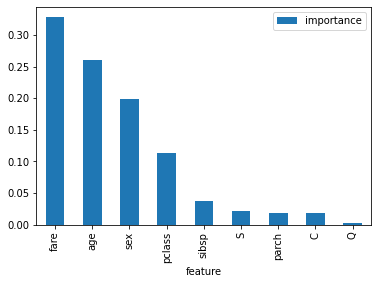

In [51]:
#Visualize the importance
importances.plot.bar()

In [52]:
#Print Prediction of Random Forest Classifier model
pred = all_model[6].predict(x_test)
print(pred)

#Print a space
print()

#Print the actual values
print(y_test)

[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0
 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0
 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1
 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0
 0 0]

      survived
4            0
9            0
12           1
13           1
17           1
...        ...
1266         0
1267         0
1271         0
1290         1
1306         0

[224 rows x 1 columns]


#Predicting my and jack, rose survival

In [53]:
#Assuming my values
my_survival = [[3, 1, 26, 1, 2, 180, 0, 0, 1]]

In [54]:
my_survival

[[3, 1, 26, 1, 2, 180, 0, 0, 1]]

In [55]:
#Predicting my survival
pred_my = all_model[6].predict(my_survival)

In [56]:
if pred_my == 1:
  print ('Yes you survived')
else:
  print('No you didn''t survive')

No you didnt survive


In [66]:
#predicting probability of my survival
prediction_my = model.predict(my_survival)
print(prediction_my)

[[0.03922775]]


In [61]:
jack = [[3, 1, 23, 1, 0, 5.0000, 0, 0, 1]]
rose = [[1, 0, 20, 1, 0, 100.0000, 0, 0, 1]]

In [67]:
prediction_jack = model.predict(jack)
print(prediction_jack)

[[0.1271857]]


In [68]:
prediction_rose = model.predict(rose)
print(prediction_rose)

[[0.91810703]]
